# Pandas Cheatsheet

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic

### Series

In [3]:
s = pd.Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

### Series From List

In [4]:
data_list = [1,2,3,4,5]
s = pd.Series(data_list)
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

### Series with Custom Index/Label

In [5]:
index_custom = ['a','b','c']
data_list = [1,2,3]
s = pd.Series(data=data_list, index=index_custom)
s

a    1
b    2
c    3
dtype: int64

### Series From Dictionary

In [6]:
data_dict = {
    'a': 10,
    'b': 20,
    'c': 30
}
s = pd.Series(data=data_dict)
s

a    10
b    20
c    30
dtype: int64

### Series with Different Data Type

In [7]:
mixed_data = [1,'dua',3.0,4.5,'lima']
s = pd.Series(data=mixed_data)
s

0       1
1     dua
2     3.0
3     4.5
4    lima
dtype: object

### DataFrame

In [8]:
df = pd.DataFrame({
    'nama': ['Orang 1', 'Orang 2', 'Orang 3'],
    'usia': [23, 50, 35],
    'kota': ['Jakarta','Bandung','Depok']
})
df

,nama,usia,kota
0,Orang 1,23,Jakarta
1,Orang 2,50,Bandung
2,Orang 3,35,Depok


### DataFrame from List

In [9]:
list_of_list = [
    [1,'Orang 1', 20],
    [2, 'Orang 2', 30],
    [3, 'Orang 3', 40]
]
columns = ['id','nama','usia']

df = pd.DataFrame(data=list_of_list, columns=columns)
df

,id,nama,usia
0,1,Orang 1,20
1,2,Orang 2,30
2,3,Orang 3,40


### DataFrame from Dictionary

In [10]:
data_dict = {
    'id': [1,2,3],
    'nama': ['Orang 1', 'Orang 2', 'Orang 3'],
    'usia': [15,20,30]
}

df = pd.DataFrame(data = data_dict)
df

,id,nama,usia
0,1,Orang 1,15
1,2,Orang 2,20
2,3,Orang 3,30


### Merge Series into DataFrame

In [11]:
s1 = pd.Series([1,2,3], name='id')
s2 = pd.Series(['Orang 1', 'Orang 2', 'Orang 3'], name='nama')
s3 = pd.Series([15,20,30], name='usia')

## .T (Transponse) dibutuhkan untuk mengubah baris menjadi kolom
df = pd.DataFrame([s1,s2,s3]).T
df

,id,nama,usia
0,1,Orang 1,15
1,2,Orang 2,20
2,3,Orang 3,30


### Getting Basic Information from DataFrame

In [12]:
data = {
    'A': np.random.randint(1, 100, 20),
    'B': np.random.randint(1, 100, 20),
    'C': np.random.randint(1, 100, 20),
    'D': np.random.randint(1, 100, 20)
}
df = pd.DataFrame(data=data)
df.head()

,A,B,C,D
0,23,50,39,23
1,35,47,78,74
2,83,10,31,85
3,71,98,72,19
4,55,20,13,89


In [13]:
df.tail()

,A,B,C,D
15,93,96,93,23
16,90,77,21,26
17,98,44,58,20
18,5,6,68,37
19,79,21,83,8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       20 non-null     int64
 1   B       20 non-null     int64
 2   C       20 non-null     int64
 3   D       20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


In [15]:
df.describe()

,A,B,C,D
count,20.000000,20.000000,20.000000,20.000000
mean,57.500000,43.950000,62.950000,45.850000
std,31.827661,30.072675,24.403354,29.714917
min,1.000000,2.000000,13.000000,1.000000
25%,32.750000,17.500000,45.500000,20.750000
50%,69.500000,46.500000,69.000000,39.000000
75%,83.250000,62.500000,83.000000,72.500000
max,98.000000,98.000000,98.000000,92.000000


### Identifyng Missing Data

In [16]:
data_missing = {
    'A': [1,2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1,2,3,4, np.nan]
}
df = pd.DataFrame(data=data_missing)
df

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,5.0,NaN


In [17]:
missing_data_count = df.isna().sum()
missing_data_count

A    1
B    1
C    1
dtype: int64

### Checking Data Distribution

In [18]:
ser_categorical = pd.Series(['apple','banana','apple','orange','banana','apple',
                            'apple','orange'])
value_counts = ser_categorical.value_counts()
type(value_counts) ## Series
value_counts

apple     4
banana    2
orange    2
Name: count, dtype: int64

### Checking Unique Values

In [19]:
data_sample = {
    'A': np.random.randint(1, 100, 3),
    'B': np.random.random(3),
    'C': ['apple','banana','cherry'],
    'D': pd.date_range("20230101", periods=3)
}
df = pd.DataFrame(data=data_sample)
data_types = df.dtypes
data_types

A             int64
B           float64
C            object
D    datetime64[ns]
dtype: object

In [20]:
unique_count = ser_categorical.nunique()
unique_count

3

In [21]:
unique_values = ser_categorical.unique().tolist()
unique_values

['apple', 'banana', 'orange']

### Checking Data Types

### Checking DataFrame Size

In [22]:
df_shape = df.shape
df_shape ## (3,4) 3 baris 4 kolom

(3, 4)

### Checking Columns and Index

In [23]:
df_columns = df.columns
df_index = df.index

df_columns, df_index

(Index(['A', 'B', 'C', 'D'], dtype='object'),
 RangeIndex(start=0, stop=3, step=1))

### Checking Memory Usage

In [24]:
memory_usage = df.memory_usage()
memory_usage

Index    128
A         24
B         24
C         24
D         24
dtype: int64

## Accessing Data

### Accessing Data in Series

In [25]:
s = pd.Series([10,20,30,40,50], index = ['a','b','c','d','e'])

# Mengakses element dengan index possisi
ele_pos = s[4]

# Mengakses element dengan index label
ele_label = s['c']

ele_pos, ele_label

/tmp/ipykernel_36/147560710.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ele_pos = s[4]


(50, 30)

### Accessing Data in DataFrame

In [26]:
data_example = {
    'A': [1,2,3,4,5],
    'B': ['apple','banana','cherry','date','fig'],
    'C': [1.1, 2.2, 3.3, 4.4, 5.5]
}
df = pd.DataFrame(data=data_example)

column_A = df['A']
column_B = df['B']

column_A.head(), column_B.head()

(0    1
 1    2
 2    3
 3    4
 4    5
 Name: A, dtype: int64,
 0     apple
 1    banana
 2    cherry
 3      date
 4       fig
 Name: B, dtype: object)

### Access Data in DataFrame using iloc and loc

In [27]:
row_by_idx_position = df.iloc[2]
row_by_label = df.loc[2]

row_by_idx_position, row_by_label

(A         3
 B    cherry
 C       3.3
 Name: 2, dtype: object,
 A         3
 B    cherry
 C       3.3
 Name: 2, dtype: object)

### Accessing Data in DataFrame by Subset

In [28]:
df

,A,B,C
0,1,apple,1.1
1,2,banana,2.2
2,3,cherry,3.3
3,4,date,4.4
4,5,fig,5.5


In [29]:
subset_position = df.iloc[1:4, 0:2]
subset_position

,A,B
1,2,banana
2,3,cherry
3,4,date


In [30]:
subset_label = df.loc[1:3, ['A','B']]
subset_label

,A,B
1,2,banana
2,3,cherry
3,4,date


### Accessing Data in DataFrame using at and iat

In [31]:
data_at = df.at[2, 'B']
data_at

'cherry'

In [32]:
data_iat = df.iat[2, 1]
data_iat

'cherry'

### Creating Multi index DataFrame

In [33]:
arrays = [
    ['A','A','B','B'],
    [1,2,1,2]
]
multi_index = pd.MultiIndex.from_arrays(arrays, names=('letters', 'numbers'))
data_multi = {
    'data1': [10,20,30,40],
    'data2': [100,200,300,400]
}
df = pd.DataFrame(data_multi, index=multi_index)
df

data1  data2
letters numbers              
A       1           10    100
        2           20    200
B       1           30    300
        2           40    400

In [34]:
rows_with_A = df.xs(key='A', level='letters')
rows_with_A

,data1,data2
numbers,,
1,10,100
2,20,200


In [35]:
df_query = df.query('data1 > 15 & data2 < 350')
df_query

,,data1,data2
letters,numbers,,
A,2,20,200
B,1,30,300


In [36]:
data_example = {
    'A': [1,2,3,4,5],
    'B': ['apple','banana','cherry','date','fig'],
    'C': [1.1, 2.2, 3.3, 4.4, 5.5]
}
df = pd.DataFrame(data=data_example)

taken_rows = df.take([1,3])
taken_rows

,A,B,C
1,2,banana,2.2
3,4,date,4.4


In [37]:
data = {
    'A': [i for i in range(1, 11)],
    'B': [chr(i) for i in range(65, 75)],
    'C': [i * 0.5 for i in range(1, 11)]
}
df = pd.DataFrame(data=data)
df

,A,B,C
0,1,A,0.5
1,2,B,1.0
2,3,C,1.5
3,4,D,2.0
4,5,E,2.5
5,6,F,3.0
6,7,G,3.5
7,8,H,4.0
8,9,I,4.5
9,10,J,5.0


In [38]:
subset_iloc = df.iloc[1:5, 0:2]
subset_iloc

,A,B
1,2,B
2,3,C
3,4,D
4,5,E


In [39]:
subset_loc = df.loc[1:4, ['A','B']]
subset_loc

,A,B
1,2,B
2,3,C
3,4,D
4,5,E


In [40]:
rows_greater_than_5 = df[df['A'] > 5]
rows_greater_than_5

,A,B,C
5,6,F,3.0
6,7,G,3.5
7,8,H,4.0
8,9,I,4.5
9,10,J,5.0


## Filtering Data

In [41]:
filtered_rows = df[df['A'] > 3]
filtered_rows

,A,B,C
3,4,D,2.0
4,5,E,2.5
5,6,F,3.0
6,7,G,3.5
7,8,H,4.0
8,9,I,4.5
9,10,J,5.0


In [42]:
multiple_conditions = df[(df['A'] > 3) & (df['C'] < 5)]
multiple_conditions

,A,B,C
3,4,D,2.0
4,5,E,2.5
5,6,F,3.0
6,7,G,3.5
7,8,H,4.0
8,9,I,4.5


In [43]:
rows_selected_value = df[df['B'].isin(['A','C','E'])]
rows_selected_value

,A,B,C
0,1,A,0.5
2,3,C,1.5
4,5,E,2.5


In [44]:
date_range = pd.date_range(start='2020-01-01', end='2020-01-10', freq='D')
df_date = pd.DataFrame(date_range, columns=['date'])
df_date['data'] = np.random.randint(0, 100, size=len(date_range))
df_date = df_date.set_index('date')

subset_date = df_date['2020-01-03':'2020-01-07']
subset_date

,data
date,
2020-01-03,6
2020-01-04,78
2020-01-05,30
2020-01-06,46
2020-01-07,98


In [45]:
subset_where = df_date['data'].where(df_date['data'] > 15)
subset_where

date
2020-01-01     NaN
2020-01-02    78.0
2020-01-03     NaN
2020-01-04    78.0
2020-01-05    30.0
2020-01-06    46.0
2020-01-07    98.0
2020-01-08     NaN
2020-01-09    70.0
2020-01-10    96.0
Name: data, dtype: float64

## Basic Operation

### Add New Column

In [46]:
data_example = {
    'A': [1,2,3,4,5],
    'B': ['apple','banana','cherry','date','fig'],
    'C': [1.1, 2.2, 3.3, 4.4, 5.5]
}
df = pd.DataFrame(data=data_example)

df['D'] = df['A'] * 10
df['E'] = 'new_column'
df.head()

,A,B,C,D,E
0,1,apple,1.1,10,new_column
1,2,banana,2.2,20,new_column
2,3,cherry,3.3,30,new_column
3,4,date,4.4,40,new_column
4,5,fig,5.5,50,new_column


### Deleting Column and Row

In [47]:
df_example_dropped_col = df.drop(columns=['E'])
df_example_dropped_col

,A,B,C,D
0,1,apple,1.1,10
1,2,banana,2.2,20
2,3,cherry,3.3,30
3,4,date,4.4,40
4,5,fig,5.5,50


In [48]:
df_example_dropped_row = df.drop(index = 4)
df_example_dropped_row

,A,B,C,D,E
0,1,apple,1.1,10,new_column
1,2,banana,2.2,20,new_column
2,3,cherry,3.3,30,new_column
3,4,date,4.4,40,new_column


## Applying Change to Data

In [49]:
df['B_Upper'] = df['B'].apply(lambda x: x.upper())
df[['B_Upper','B']]

,B_Upper,B
0,APPLE,apple
1,BANANA,banana
2,CHERRY,cherry
3,DATE,date
4,FIG,fig


### Replacing a Value

In [50]:
df_replaced = df.replace({
    'B': {
        'apple': 'grape',
        'banana': 'watermelon'
    }
})
df_replaced

,A,B,C,D,E,B_Upper
0,1,grape,1.1,10,new_column,APPLE
1,2,watermelon,2.2,20,new_column,BANANA
2,3,cherry,3.3,30,new_column,CHERRY
3,4,date,4.4,40,new_column,DATE
4,5,fig,5.5,50,new_column,FIG


### Rename a Column

In [51]:
df_renamed = df.rename(columns={
    'A': 'X',
    'B': 'Y'
})
df_renamed

,X,Y,C,D,E,B_Upper
0,1,apple,1.1,10,new_column,APPLE
1,2,banana,2.2,20,new_column,BANANA
2,3,cherry,3.3,30,new_column,CHERRY
3,4,date,4.4,40,new_column,DATE
4,5,fig,5.5,50,new_column,FIG


## Resetting and Setting Index

In [52]:
df_set_index = df.set_index('B')
df_set_index

,A,C,D,E,B_Upper
B,,,,,
apple,1,1.1,10,new_column,APPLE
banana,2,2.2,20,new_column,BANANA
cherry,3,3.3,30,new_column,CHERRY
date,4,4.4,40,new_column,DATE
fig,5,5.5,50,new_column,FIG


In [53]:
df_reset_index = df_set_index.reset_index()
df_reset_index

,B,A,C,D,E,B_Upper
0,apple,1,1.1,10,new_column,APPLE
1,banana,2,2.2,20,new_column,BANANA
2,cherry,3,3.3,30,new_column,CHERRY
3,date,4,4.4,40,new_column,DATE
4,fig,5,5.5,50,new_column,FIG


In [54]:
data = {
    'A': [i for i in range(1, 11)],
    'B': [chr(i) for i in range(65, 75)],
    'C': [i * 0.5 for i in range(1, 11)]
}
df = pd.DataFrame(data=data)
df

new_index = list(range(0,12))
reindex_df = df.reindex(new_index)
reindex_df

,A,B,C
0,1.0,A,0.5
1,2.0,B,1.0
2,3.0,C,1.5
3,4.0,D,2.0
4,5.0,E,2.5
5,6.0,F,3.0
6,7.0,G,3.5
7,8.0,H,4.0
8,9.0,I,4.5
9,10.0,J,5.0


## Pandas Method

### Statistic Method

In [55]:
np.random.seed(42)
df_stats = pd.DataFrame({
    'A': np.random.randn(100),
    'B': np.random.randint(1, 10, 100),
    'C': np.random.choice(['pencil','pen','eraser'], 100)
})
df_stats

,A,B,C
0,0.496714,9,pen
1,-0.138264,5,pen
2,0.647689,1,pen
3,1.523030,3,pen
4,-0.234153,8,eraser
...,...,...,...
95,-1.463515,3,eraser
96,0.296120,9,pencil
97,0.261055,3,pencil
98,0.005113,9,pencil


### Mean, Mode, Modus

In [56]:
mean_A = df_stats['A'].mean()
median_B = df_stats['B'].median()
mode_C = df_stats['C'].mode()

mean_A, median_B, mode_C

(-0.10384651739409384,
 4.0,
 0    pencil
 Name: C, dtype: object)

### Aggregate Method

In [57]:
aggregated = df_stats.agg({
    'A': ['mean','std','min','max'],
    'B': ['sum','median']
})
aggregated

,A,B
mean,-0.103847,NaN
std,0.908168,NaN
min,-2.619745,NaN
max,1.852278,NaN
sum,NaN,473.0
median,NaN,4.0


In [58]:
df_stats['length_C'] = df_stats['C'].apply(len)
df_stats[['C','length_C']]

,C,length_C
0,pen,3
1,pen,3
2,pen,3
3,pen,3
4,eraser,6
...,...,...
95,eraser,6
96,pencil,6
97,pencil,6
98,pencil,6


In [59]:
replacement = {
    'pencil': 'PCL',
    'pen': 'PN',
    'eraser': 'ERS'
}
df_stats['short_C'] = df_stats['C'].map(replacement)
df_stats

,A,B,C,length_C,short_C
0,0.496714,9,pen,3,PN
1,-0.138264,5,pen,3,PN
2,0.647689,1,pen,3,PN
3,1.523030,3,pen,3,PN
4,-0.234153,8,eraser,6,ERS
...,...,...,...,...,...
95,-1.463515,3,eraser,6,ERS
96,0.296120,9,pencil,6,PCL
97,0.261055,3,pencil,6,PCL
98,0.005113,9,pencil,6,PCL


### Method Chaining

In [60]:
average_A_notna = df_stats[df_stats['B'].notna()]['A'].mean()
average_A_notna

-0.10384651739409384

## Joining DataFrame

### Join with concat

In [61]:
df1 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

df2 = pd.DataFrame({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7'],
    'C': ['C4', 'C5', 'C6', 'C7'],
    'D': ['D4', 'D5', 'D6', 'D7']
})

concatenated = pd.concat([df1, df2])
concatenated

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [62]:
df_row_reindex = pd.concat([df1,df2], ignore_index=True)
df_row_reindex

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [63]:
df_concat_along_column = pd.concat([df1,df2], axis=1)
df_concat_along_column

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


### Join with Merge

In [64]:
df_left = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

df_right = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

merged = df_left.merge(df_right, on='key')
merged

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [65]:
merged_suffix = df_left.merge(df_right, on='key', suffixes=('_left', '_right'))
merged_suffix

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [66]:
df_left_join = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2'])

df_right_join = pd.DataFrame({
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
}, index=['K0', 'K2', 'K3'])

merged_index = df_left_join.merge(df_right_join, left_index=True, right_index=True, suffixes=('_left','_right'))
merged_index

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C1,D1


### Join with Join

In [67]:
df_left_join = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2'])

df_right_join = pd.DataFrame({
    'C': ['C0', 'C1', 'C2'],
    'D': ['D0', 'D1', 'D2']
}, index=['K0', 'K2', 'K3'])

joined = df_left_join.join(df_right_join, how='outer')
joined

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1
K3,NaN,NaN,C2,D2


## Sorting

### With sort_index()

In [68]:
df_unsorted_index = pd.DataFrame({
    'A': [3, 1, 2],
    'B': [33, 11, 22],
    'C': ['C3', 'C1', 'C2']
}, index=['K2', 'K0', 'K1'])
df_unsorted_index

df_sorted_index = df_unsorted_index.sort_index()
df_sorted_index

,A,B,C
K0,1,11,C1
K1,2,22,C2
K2,3,33,C3


### Sort by Single Column

In [69]:
df_sorted_values = df_unsorted_index.sort_values(by='A')
df_sorted_values

,A,B,C
K0,1,11,C1
K1,2,22,C2
K2,3,33,C3


### Sort by Multiple Column

In [70]:
df_sorted_multi_values = df_unsorted_index.sort_values(by=['A','B'])
df_sorted_multi_values

,A,B,C
K0,1,11,C1
K1,2,22,C2
K2,3,33,C3


### Reverse Sort

In [71]:
df_sorted_descending = df_unsorted_index.sort_values(by='A', ascending=False)
df_sorted_descending

,A,B,C
K2,3,33,C3
K1,2,22,C2
K0,1,11,C1


### Ascending-Descending Depends By Column

In [72]:
df_multi_sort = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 25, 35, 30],
    'Score': [85, 90, 88, 78]
})
df_sorted_multi_order = df_multi_sort.sort_values(by=['Age','Score'], ascending=[True,False])
df_sorted_multi_order

,Name,Age,Score
1,Bob,25,90
0,Alice,25,85
3,David,30,78
2,Charlie,35,88


### Sort by MultiIndex

In [73]:
arrays = [
    ['K0','K0','K1','K2','K2','K3'],
    ['L0','L1','L0','L0','L1','L0']
]
index = pd.MultiIndex.from_arrays(arrays, names=('key1','key2'))
df_multiindex = pd.DataFrame({
    'A': [1,2,3,4,5,6],
    'B': [6,5,4,3,2,1]
}, index=index)
df_multiindex

A  B
key1 key2      
K0   L0    1  6
     L1    2  5
K1   L0    3  4
K2   L0    4  3
     L1    5  2
K3   L0    6  1

In [74]:
df_sorted_multiindex = df_multiindex.sort_index(level='key2')
df_sorted_multiindex

,,A,B
key1,key2,,
K0,L0,1,6
K1,L0,3,4
K2,L0,4,3
K3,L0,6,1
K0,L1,2,5
K2,L1,5,2


### Sort by Categorical

In [75]:
df_categorical = pd.DataFrame({
    'grade': ['gold', 'silver', 'bronze', 'platinum', 'gold', 'silver']
})
order = ['bronze','silver','gold','platinum']
df_categorical['grade'] = pd.Categorical(df_categorical['grade'], categories=order, ordered=True)
df_categorical.info()

df_sorted_categorical = df_categorical.sort_values(by='grade')
df_sorted_categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   grade   6 non-null      category
dtypes: category(1)
memory usage: 338.0 bytes


,grade
2,bronze
1,silver
5,silver
0,gold
4,gold
3,platinum


### Sort by String Length

In [79]:
df_custom_sort = pd.DataFrame({
    'Name': ['Alice','Bob','Charlie','David'],
    'Age': [25,30,35,40]
})

def custom_sort(series):
    return series.str.len()

sorted_df_custom_sort = df_custom_sort.sort_values(by='Name', key=custom_sort)
sorted_df_custom_sort

,Name,Age
1,Bob,30
0,Alice,25
3,David,40
2,Charlie,35


### Sort by Mixed String

In [81]:
df_mixed_case = pd.DataFrame({
    'name': ['alice', 'Bob', 'CHARLIE', 'David', 'eve', 'FRANK']
})

df_sorted_case_insensitive = df_mixed_case.sort_values(by='name', key=lambda x: x.str.lower())
df_sorted_case_insensitive

,name
0,alice
1,Bob
2,CHARLIE
3,David
4,eve
5,FRANK


## Data Cleaning

### Treating Missing Value

In [82]:
df_missing = pd.DataFrame({
    'A': [1,2,np.nan,4,5],
    'B': [5,np.nan,np.nan,8,9],
    'C': [1,2,3,4,5]
})

df_missing_isna = df_missing.isna()
df_missing_isna

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False
3,False,False,False
4,False,False,False


In [84]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       3 non-null      float64
 2   C       5 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 248.0 bytes


In [86]:
df_missing.isna().sum()

A    1
B    2
C    0
dtype: int64

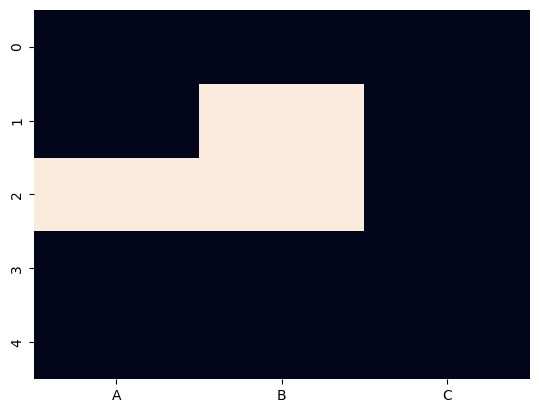

In [88]:
sns.heatmap(df_missing.isna(), cbar=False)
plt.show()

In [89]:
series_missing = pd.Series([1, np.nan, 3, 4, np.nan])
series_missing.isna()

0    False
1     True
2    False
3    False
4     True
dtype: bool

### Treating Missing Data in Categorical Value

In [96]:
df_categorical = pd.DataFrame({
    'A': ['foo', '', 'bar'],
    'B': ['baz','N/A', ''
]})
df_categorical.replace(['','N/A','?'], np.nan, inplace=True)
df_categorical.isna()

,A,B
0,False,False
1,True,True
2,False,True


### Fill Missing Value With Constant

In [ ]:
data = {
    'A': [1, np.nan, 3, 4, 5],
    'B': [5, 4, np.nan, 2, 1]
}
df = pd.DataFrame(data)
df['A'].fillna(0)

### Fill Missing Value With Interpolation

In [102]:
df['B'].ffill()

0    5.0
1    4.0
2    4.0
3    2.0
4    1.0
Name: B, dtype: float64

### Fill Missing Value With Aggregation

In [105]:
df['A'].fillna(df['A'].mean())

0    1.00
1    3.25
2    3.00
3    4.00
4    5.00
Name: A, dtype: float64

In [106]:
df.dropna()

,A,B
0,1.0,5.0
3,4.0,2.0
4,5.0,1.0


### Delete Null Value

In [107]:
data = {
    'A': [1, np.nan, 3, 4, 5],
    'B': [5, 4, np.nan, 2, 1],
    'Company': ['Apple', 'Microsoft', 'Apple', 'Apple', 'Microsoft']
}
df = pd.DataFrame(data)
df_dropped = df.dropna()
df_dropped

,A,B,Company
0,1.0,5.0,Apple
3,4.0,2.0,Apple
4,5.0,1.0,Microsoft


In [108]:
df_dropped_A = df.dropna(subset=['A'])
df_dropped_A

,A,B,Company
0,1.0,5.0,Apple
2,3.0,NaN,Apple
3,4.0,2.0,Apple
4,5.0,1.0,Microsoft


In [109]:
df_dropped_columns = df.dropna(axis=1)
df_dropped_columns

,Company
0,Apple
1,Microsoft
2,Apple
3,Apple
4,Microsoft


In [110]:
df_dropped_thresh = df.dropna(thresh=2)
df_dropped_thresh

,A,B,Company
0,1.0,5.0,Apple
1,NaN,4.0,Microsoft
2,3.0,NaN,Apple
3,4.0,2.0,Apple
4,5.0,1.0,Microsoft


### Transforming Data

In [111]:
df['A'] * 2

0     2.0
1     NaN
2     6.0
3     8.0
4    10.0
Name: A, dtype: float64

In [112]:
df['A'].apply(lambda x: x * 2)

0     2.0
1     NaN
2     6.0
3     8.0
4    10.0
Name: A, dtype: float64

In [113]:
df['Company'].map({
    'Apple': 'AAPL',
    'Microsoft': 'MSFT'
})

0    AAPL
1    MSFT
2    AAPL
3    AAPL
4    MSFT
Name: Company, dtype: object

In [114]:
df['Company'].replace({
    'Apple': 'AAPL',
    'Microsoft': 'MSFT'
})

0    AAPL
1    MSFT
2    AAPL
3    AAPL
4    MSFT
Name: Company, dtype: object

In [115]:
mean_A = df['A'].mean()
df['A'] - mean_A

0   -2.25
1     NaN
2   -0.25
3    0.75
4    1.75
Name: A, dtype: float64

In [118]:
bins = [0,2,4,6]
labels = ['Low','Medium','High']
df['A_binned'] = pd.cut(df['A'], bins=bins, labels=labels)
df

,A,B,Company,A_binned
0,1.0,5.0,Apple,Low
1,NaN,4.0,Microsoft,NaN
2,3.0,NaN,Apple,Medium
3,4.0,2.0,Apple,Medium
4,5.0,1.0,Microsoft,High


In [119]:
df['A_normalized'] = (df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())
df

,A,B,Company,A_binned,A_normalized
0,1.0,5.0,Apple,Low,0.00
1,NaN,4.0,Microsoft,NaN,NaN
2,3.0,NaN,Apple,Medium,0.50
3,4.0,2.0,Apple,Medium,0.75
4,5.0,1.0,Microsoft,High,1.00


In [120]:
df['A_log'] = np.log(df['A'])
df

,A,B,Company,A_binned,A_normalized,A_log
0,1.0,5.0,Apple,Low,0.00,0.000000
1,NaN,4.0,Microsoft,NaN,NaN,NaN
2,3.0,NaN,Apple,Medium,0.50,1.098612
3,4.0,2.0,Apple,Medium,0.75,1.386294
4,5.0,1.0,Microsoft,High,1.00,1.609438


In [123]:
pd.get_dummies(df, columns=['Company'])

,A,B,A_binned,A_normalized,A_log,Company_Apple,Company_Microsoft
0,1.0,5.0,Low,0.00,0.000000,True,False
1,NaN,4.0,NaN,NaN,NaN,False,True
2,3.0,NaN,Medium,0.50,1.098612,True,False
3,4.0,2.0,Medium,0.75,1.386294,True,False
4,5.0,1.0,High,1.00,1.609438,False,True


In [126]:
df.query('A > 2')['A'] * 2

2     6.0
3     8.0
4    10.0
Name: A, dtype: float64

## Changing Data Type

In [128]:
df = pd.DataFrame({
    'harga': ['1000', '2000', '3000'],
    'tanggal': ['2021-01-01', '2021-01-02', '2021-01-03']
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   harga    3 non-null      object
 1   tanggal  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [129]:
df['harga'] = df['harga'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   harga    3 non-null      int64 
 1   tanggal  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [130]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   harga    3 non-null      int64         
 1   tanggal  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [131]:
df['harga'] = ['1000', 'dua ribu', '3000']
df['harga'] = pd.to_numeric(df['harga'], errors='coerce')
df

,harga,tanggal
0,1000.0,2021-01-01
1,NaN,2021-01-02
2,3000.0,2021-01-03


In [133]:
df = df.infer_objects()
df.dtypes

harga             float64
tanggal    datetime64[ns]
dtype: object

## Duplicate Data

In [136]:
data_dup = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'David'],
    'Age': [25, 30, 35, 25, 30, 40],
    'Occupation': ['Engineer', 'Doctor', 'Artist', 'Engineer', 'Doctor',
    'Writer']
}
df_dup = pd.DataFrame(data_dup)
df_dup.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [138]:
df_dup.drop_duplicates(inplace=True)
df_dup

,Name,Age,Occupation
0,Alice,25,Engineer
1,Bob,30,Doctor
2,Charlie,35,Artist
5,David,40,Writer


In [141]:
data_name_dup = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'David'],
    'Age': [25, 30, 35, 40, 45, 40],
    'Occupation': ['Engineer', 'Doctor', 'Artist', 'Writer', 'Dancer','Writer']
}
df_name_dup = pd.DataFrame(data_name_dup)
df_name_dup.drop_duplicates(subset=['Name'], inplace=True)
df_name_dup

## In case you want to retain order
# df.drop_duplicates(keep='last', inplace=True)

,Name,Age,Occupation
0,Alice,25,Engineer
1,Bob,30,Doctor
2,Charlie,35,Artist
5,David,40,Writer


## Scaling

In [164]:
np.random.seed(0)
data_norm = {
    'Salary': np.random.randint(4000, 9000, 10),
    'Age': np.random.randint(20, 60, 10),
    'Experience': np.random.randint(1, 20, 10)
}
df_norm = pd.DataFrame(data_norm)
df_norm

,Salary,Age,Experience
0,6732,58,17
1,6607,59,6
2,5653,43,16
3,7264,44,16
4,8931,37,1
5,8859,57,19
6,5033,45,4
7,8373,33,18
8,7468,28,15
9,4705,29,8


### Min-Max Scaling

In [165]:
def minmax_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

df_norm = minmax_scaling(df_norm)
df_norm

,Salary,Age,Experience
0,0.479650,0.967742,0.888889
1,0.450071,1.000000,0.277778
2,0.224326,0.483871,0.833333
3,0.605537,0.516129,0.833333
4,1.000000,0.290323,0.000000
5,0.982963,0.935484,1.000000
6,0.077615,0.548387,0.166667
7,0.867960,0.161290,0.944444
8,0.653810,0.000000,0.777778
9,0.000000,0.032258,0.388889


### Z-Score

In [166]:
def zscore_scaling(series):
    return (series - series.mean()) / series.std()

df_norm_zscore = df_norm.apply(zscore_scaling)
df_norm_zscore

,Salary,Age,Experience
0,-0.152648,1.253316,0.761510
1,-0.235429,1.338576,-0.913812
2,-0.867212,-0.025578,0.609208
3,0.199667,0.059682,0.609208
4,1.303632,-0.537136,-1.675321
5,1.255950,1.168057,1.066113
6,-1.277804,0.144941,-1.218415
7,0.934099,-0.878174,0.913812
8,0.334766,-1.304472,0.456906
9,-1.495021,-1.219213,-0.609208


In [167]:
def log_transform(series):
    return np.log1p(series)

df_norm_log = df_norm.apply(log_transform)
df_norm_log

,Salary,Age,Experience
0,0.391805,0.676887,0.635989
1,0.371613,0.693147,0.245122
2,0.202390,0.394654,0.606136
3,0.473458,0.416160,0.606136
4,0.693147,0.254892,0.000000
5,0.684592,0.660357,0.693147
6,0.074750,0.437214,0.154151
7,0.624847,0.149532,0.664976
8,0.503082,0.000000,0.575364
9,0.000000,0.031749,0.328504


## String Manipulation

In [169]:
data = {
    'Nama': ['ALICE', 'Bob', 'Charlie ', ' DAvid', 'eve'],
    'Alamat': ['JL. Anggrek 12', 'Jl. Mawar No. 5', 'Jl. Melati, No.10', 'Jl. Tulip 3A', 'Jl. Sakura 2B']
}
df = pd.DataFrame(data)
df

,Nama,Alamat
0,ALICE,JL. Anggrek 12
1,Bob,Jl. Mawar No. 5
2,Charlie,"Jl. Melati, No.10"
3,DAvid,Jl. Tulip 3A
4,eve,Jl. Sakura 2B


In [170]:
df['Nama'].str.lower()

0       alice
1         bob
2    charlie 
3       david
4         eve
Name: Nama, dtype: object

In [171]:
df['Nama'].str.strip()

0      ALICE
1        Bob
2    Charlie
3      DAvid
4        eve
Name: Nama, dtype: object

In [175]:
df[['Jalan','No']] = df['Alamat'].str.split(',', expand=True)
df

,Nama,Alamat,Jalan,No
0,ALICE,JL. Anggrek 12,JL. Anggrek 12,None
1,Bob,Jl. Mawar No. 5,Jl. Mawar No. 5,None
2,Charlie,"Jl. Melati, No.10",Jl. Melati,No.10
3,DAvid,Jl. Tulip 3A,Jl. Tulip 3A,None
4,eve,Jl. Sakura 2B,Jl. Sakura 2B,None


In [179]:
df['Info'] = df['Nama'] + ' tinggal di ' + df['Alamat']
df

,Nama,Alamat,Jalan,No,Info
0,ALICE,JL. Anggrek 12,JL. Anggrek 12,None,ALICE tinggal di JL. Anggrek 12
1,Bob,Jl. Mawar No. 5,Jl. Mawar No. 5,None,Bob tinggal di Jl. Mawar No. 5
2,Charlie,"Jl. Melati, No.10",Jl. Melati,No.10,"Charlie tinggal di Jl. Melati, No.10"
3,DAvid,Jl. Tulip 3A,Jl. Tulip 3A,None,DAvid tinggal di Jl. Tulip 3A
4,eve,Jl. Sakura 2B,Jl. Sakura 2B,None,eve tinggal di Jl. Sakura 2B


In [180]:
df['Alamat'].str.replace('JL.','Jalan')

0     Jalan Anggrek 12
1      Jl. Mawar No. 5
2    Jl. Melati, No.10
3         Jl. Tulip 3A
4        Jl. Sakura 2B
Name: Alamat, dtype: object

In [181]:
df['Alamat'].str.contains('Anggrek')

0     True
1    False
2    False
3    False
4    False
Name: Alamat, dtype: bool

In [182]:
df['No Rumah'] = df['Alamat'].str.extract('(\d+)')
df

,Nama,Alamat,Jalan,No,Info,No Rumah
0,ALICE,JL. Anggrek 12,JL. Anggrek 12,None,ALICE tinggal di JL. Anggrek 12,12
1,Bob,Jl. Mawar No. 5,Jl. Mawar No. 5,None,Bob tinggal di Jl. Mawar No. 5,5
2,Charlie,"Jl. Melati, No.10",Jl. Melati,No.10,"Charlie tinggal di Jl. Melati, No.10",10
3,DAvid,Jl. Tulip 3A,Jl. Tulip 3A,None,DAvid tinggal di Jl. Tulip 3A,3
4,eve,Jl. Sakura 2B,Jl. Sakura 2B,None,eve tinggal di Jl. Sakura 2B,2


In [184]:
df['Panjang Nama'] = df['Nama'].str.len()
df

,Nama,Alamat,Jalan,No,Info,No Rumah,Panjang Nama
0,ALICE,JL. Anggrek 12,JL. Anggrek 12,None,ALICE tinggal di JL. Anggrek 12,12,5
1,Bob,Jl. Mawar No. 5,Jl. Mawar No. 5,None,Bob tinggal di Jl. Mawar No. 5,5,3
2,Charlie,"Jl. Melati, No.10",Jl. Melati,No.10,"Charlie tinggal di Jl. Melati, No.10",10,8
3,DAvid,Jl. Tulip 3A,Jl. Tulip 3A,None,DAvid tinggal di Jl. Tulip 3A,3,6
4,eve,Jl. Sakura 2B,Jl. Sakura 2B,None,eve tinggal di Jl. Sakura 2B,2,3


In [193]:
# Data awal
tanggal_data = ['12-01-2023', '15 Jan 2023', 'Jan 20, 2023']
df_tanggal = pd.DataFrame({'Tanggal': tanggal_data})

# Mengonversi kolom 'Tanggal' menjadi format datetime
df_tanggal['Tanggal'] = pd.to_datetime(df_tanggal['Tanggal'], errors='coerce')

# Menampilkan hasil
df_tanggal.drop([1,2])
# df_tanggal.drop(['Tanggal'],axis=1)

,Nama,Alamat,Jalan,No,Info,No Rumah,Panjang Nama
0,ALICE,JL. Anggrek 12,JL. Anggrek 12,None,ALICE tinggal di JL. Anggrek 12,12,5
1,Bob,Jl. Mawar No. 5,Jl. Mawar No. 5,None,Bob tinggal di Jl. Mawar No. 5,5,3
2,Charlie,"Jl. Melati, No.10",Jl. Melati,No.10,"Charlie tinggal di Jl. Melati, No.10",10,8
3,DAvid,Jl. Tulip 3A,Jl. Tulip 3A,None,DAvid tinggal di Jl. Tulip 3A,3,6
4,eve,Jl. Sakura 2B,Jl. Sakura 2B,None,eve tinggal di Jl. Sakura 2B,2,3


In [202]:
df_tanggal['Hari'] = df_tanggal['Tanggal'].dt.day
df_tanggal['Bulan'] = df_tanggal['Tanggal'].dt.month
df_tanggal['Tahun'] = df_tanggal['Tanggal'].dt.year
df_tanggal

,Tanggal,Hari,Bulan,Tahun
0,2023-12-01,1.0,12.0,2023.0
1,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN


## Apply and Map

In [214]:
df = pd.DataFrame({
    'Nama': ['Alice', 'Bob', 'Charlie', 'David'],
    'Usia': [25, 30, 35, 40],
})

df['Panjang Nama'] = df['Nama'].apply(len)
df

,Nama,Usia,Panjang Nama
0,Alice,25,5
1,Bob,30,3
2,Charlie,35,7
3,David,40,5


In [204]:
def kategori_usia(usia):
    return 'Muda' if usia < 30 else 'Tua'

df['Kategori_Usia'] = df['Usia'].map(kategori_usia)
df

,Nama,Usia,Panjang Nama,Kategori_Usia
0,Alice,25,5,Muda
1,Bob,30,3,Tua
2,Charlie,35,7,Tua
3,David,40,5,Tua


In [207]:
df['Setengah_Usia'] = df['Usia'].apply(lambda x: x/2)
df

,Nama,Usia,Panjang Nama,Kategori_Usia,Setengah_Usia
0,Alice,25,5,Muda,12.5
1,Bob,30,3,Tua,15.0
2,Charlie,35,7,Tua,17.5
3,David,40,5,Tua,20.0


In [219]:
hobi_kamus = {
    'Alice': 'Membaca',
    'Bob': 'Bersepeda',
    'Charlie': 'Memasak',
    'David': 'Menulis'
}
df['Hobi'] = df['Nama'].map(hobi_kamus)
df

,Nama,Usia,Panjang Nama,Info,Hobi
0,Alice,25,5,Alice berusia 25 tahun,Membaca
1,Bob,30,3,Bob berusia 30 tahun,Bersepeda
2,Charlie,35,7,Charlie berusia 35 tahun,Memasak
3,David,40,5,David berusia 40 tahun,Menulis


In [220]:
df['Info'] = df.apply(lambda x: f"{x['Nama']} berusia {x['Usia']} tahun", axis=1)
df

,Nama,Usia,Panjang Nama,Info,Hobi
0,Alice,25,5,Alice berusia 25 tahun,Membaca
1,Bob,30,3,Bob berusia 30 tahun,Bersepeda
2,Charlie,35,7,Charlie berusia 35 tahun,Memasak
3,David,40,5,David berusia 40 tahun,Menulis


In [221]:
df['Adalah_Penulis'] = df['Hobi'].apply(lambda x: True if x == "Menulis" else False)
df

,Nama,Usia,Panjang Nama,Info,Hobi,Adalah_Penulis
0,Alice,25,5,Alice berusia 25 tahun,Membaca,False
1,Bob,30,3,Bob berusia 30 tahun,Bersepeda,False
2,Charlie,35,7,Charlie berusia 35 tahun,Memasak,False
3,David,40,5,David berusia 40 tahun,Menulis,True


In [222]:
warna_kamus = {
    'Alice': 'Merah',
    'Charlie': 'Hijau',
}
df['Warna_Favorit'] = df['Nama'].map(warna_kamus).fillna('Biru')
df

,Nama,Usia,Panjang Nama,Info,Hobi,Adalah_Penulis,Warna_Favorit
0,Alice,25,5,Alice berusia 25 tahun,Membaca,False,Merah
1,Bob,30,3,Bob berusia 30 tahun,Bersepeda,False,Biru
2,Charlie,35,7,Charlie berusia 35 tahun,Memasak,False,Hijau
3,David,40,5,David berusia 40 tahun,Menulis,True,Biru


In [224]:
def aktivitas_preferensi(row):
    if row == "Bersepeda":
        return "Luar"
    return "Dalam"

df['Preferensi_Aktivitas'] = df['Hobi'].map(aktivitas_preferensi)
df

,Nama,Usia,Panjang Nama,Info,Hobi,Adalah_Penulis,Warna_Favorit,Preferensi_Aktivitas
0,Alice,25,5,Alice berusia 25 tahun,Membaca,False,Merah,Dalam
1,Bob,30,3,Bob berusia 30 tahun,Bersepeda,False,Biru,Luar
2,Charlie,35,7,Charlie berusia 35 tahun,Memasak,False,Hijau,Dalam
3,David,40,5,David berusia 40 tahun,Menulis,True,Biru,Dalam
